In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import data

In [149]:
PATH = "..\data\msamd_14454.csv"

# pd.describe_option('display')
df = pd.read_csv(PATH)
df = df.dropna(subset=['census_tract'])
df['census_tract'] = df['census_tract'].astype(str).apply(lambda x: x.split(".")[0])
df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24584\1467423137.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)
C:\Users\Owner\AppData\Local\Temp\ipykernel_24584\1467423137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['census_tract'] = df['census_tract'].astype(str).apply(lambda x: x.split(".")[0])


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,25021402102,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,25021403300,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,25023503101,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,25023510900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,25025130406,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


### Drop irrelevant features

In [111]:
df.drop(["lei", "derived_msa-md","state_code","denial_reason-2", "denial_reason-3","denial_reason-4","aus-2", "aus-3", "aus-4","aus-5"], axis=1).head()
# df = df[["county_code","census_tract", "conforming_loan_limit"]]


,activity_year,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,25021.0,25021402102,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,2,10,4448,31.27,113700,91,1016,1519,72
1,2021,25021.0,25021403300,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,4,...,1,1,10,4230,7.78,113700,179,1228,1394,60
2,2021,25023.0,25023503101,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1,10,7312,2.95,113700,132,2099,2345,43
3,2021,25023.0,25023510900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Joint,3,...,1,1,9,2380,77.98,113700,18,16,343,51
4,2021,25025.0,25025130406,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,1,1,10,5399,69.98,113700,54,568,1437,48


### map load

In [136]:
import geopandas as gpd
shapefile_path = "../data/census_tract_data/Census2020_Tracts.shp"
tracts = gpd.read_file(shapefile_path)

tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    207 non-null    int64   
 1   STATEFP20   207 non-null    object  
 2   COUNTYFP20  207 non-null    object  
 3   TRACTCE20   207 non-null    object  
 4   GEOID20     207 non-null    object  
 5   NAME20      207 non-null    object  
 6   NAMELSAD20  207 non-null    object  
 7   MTFCC20     207 non-null    object  
 8   FUNCSTAT20  207 non-null    object  
 9   ALAND20     207 non-null    int64   
 10  AWATER20    207 non-null    int64   
 11  INTPTLAT20  207 non-null    object  
 12  INTPTLON20  207 non-null    object  
 13  Shape_STAr  207 non-null    float64 
 14  Shape_STLe  207 non-null    float64 
 15  geometry    207 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 26.0+ KB


In [137]:
tracts.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,17120,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2..."
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,38736,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2..."
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,11680,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2..."
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,3116,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2..."
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,0,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2..."


<Axes: >

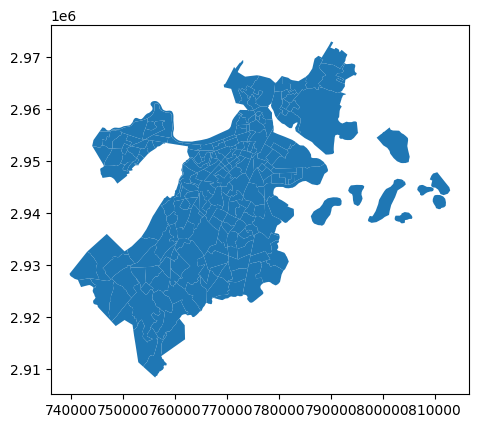

In [138]:
tracts.plot()

## Population distribution

In [130]:
tracts.plot(column='')

## Sex discrimination

As a {city concil}, I want to {know which area has sex discrimination}.
To do that, I need to know that:
    for each {census tract}:
        is there {sex discrimination}
To determine whether a discrimination exist,
    I need to show that 
        for people who has similar loan amount, does difference in gender affect the approval rate.

## approved loan amount

In [131]:
def df_merge(df1, df2, column = "derived_sex"):

    df_accept = df1.loc[df1["action_taken"].isin([1, 2])] # only take approval  # TODO: need to change 

    grouped = df_accept.groupby([column,'census_tract']).mean()['loan_amount'].reset_index()
    pivot_table = pd.pivot_table(grouped, values='loan_amount', index='census_tract', columns=column)
    new_df = pivot_table.reset_index()

    # rename the columns to remove the 'derived_sex' prefix
    new_df.columns = ['census_tract'] + list(new_df.columns[1:].str.split('_').str[1]) 

    # new_df = new_df.fillna(0)
    new_df = new_df.fillna(new_df.mean())
    sex_types = df_accept[column].unique().tolist()

    for i in range(1, len(new_df.columns)):
        new_df = new_df.rename(columns={new_df.columns[i]: sex_types[i-1]})

    merge_tract = df2.merge(new_df, left_on='GEOID20', right_on='census_tract', how='left')


In [132]:
# remove rejected cases
df_accept = df.loc[df["action_taken"].isin([1, 2])]

# group the original dataframe by 'derived_sex' and 'census_tract'
grouped = df_accept.groupby(['derived_sex','census_tract']).mean()['loan_amount'].reset_index()

# create a pivot table with 'census_tract' as index, 'derived_sex' as columns, and 'loan_amount' as values
pivot_table = pd.pivot_table(grouped, values='loan_amount', index='census_tract', columns='derived_sex')

# reset the index to create a new dataframe with 'census_tract' as a separate column
new_df = pivot_table.reset_index()

# rename the columns to remove the 'derived_sex' prefix
new_df.columns = ['census_tract'] + list(new_df.columns[1:].str.split('_').str[1])

# fill any missing values with 0
# new_df = new_df.fillna(0)
new_df = new_df.fillna(new_df.mean())

# create a list of derived_sex types from the original dataframe
sex_types = df_accept['derived_sex'].unique().tolist()

# iterate over the columns of the new dataframe and rename them
for i in range(1, len(new_df.columns)):
    new_df = new_df.rename(columns={new_df.columns[i]: sex_types[i-1]})

# def mergeDF(df1, df2, )

print(tracts.head())
new_df.head()

   OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0         1        25        025    140202  25025140202  1402.02   
1         2        25        025    140300  25025140300     1403   
2         3        25        025    140400  25025140400     1404   
3         4        25        025    140106  25025140106  1401.06   
4         5        25        025    110201  25025110201  1102.01   

     NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0  Census Tract   G5020          S  1538599     17120  +42.2495181   
1  Census Tract   G5020          S  1548879     38736  +42.2587734   
2  Census Tract   G5020          S  1874512     11680  +42.2692219   
3  Census Tract   G5020          S   278837      3116  +42.2738738   
4  Census Tract   G5020          S   348208         0  +42.2804960   

     INTPTLON20    Shape_STAr    Shape_STLe  \
0  -071.1175430  1.674441e+07  18525.133039   
1  -071.1188131  1.708768e+07  24186.699503   
2  -071.1118088  2.030132e+07

,census_tract,Male,Female,Sex Not Available,Joint
0,25021400100,495357.142857,691153.846154,1.082347e+06,3.120000e+06
1,25021400200,482234.042553,610487.804878,4.682609e+05,1.386724e+06
2,25021400300,441666.666667,708655.913978,9.402273e+05,1.286379e+06
3,25021400400,473936.170213,710514.018692,6.760769e+05,1.280676e+06
4,25021400500,578437.500000,748402.061856,5.969512e+05,1.260385e+06


In [133]:
merge_tract = tracts.merge(new_df, left_on='GEOID20', right_on='census_tract', how='left')
merge_tract.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,...,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry,census_tract,Male,Female,Sex Not Available,Joint
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,...,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2...",25025140202,326159.420290,409285.714286,434770.114943,422567.567568
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,...,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2...",25025140300,324324.324324,399032.258065,381666.666667,564285.714286
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,...,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2...",25025140400,287773.722628,339666.666667,309382.022472,259687.500000
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,...,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2...",25025140106,421666.666667,489444.444444,385000.000000,405000.000000
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,...,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2...",25025110201,380000.000000,353235.294118,322500.000000,674000.000000


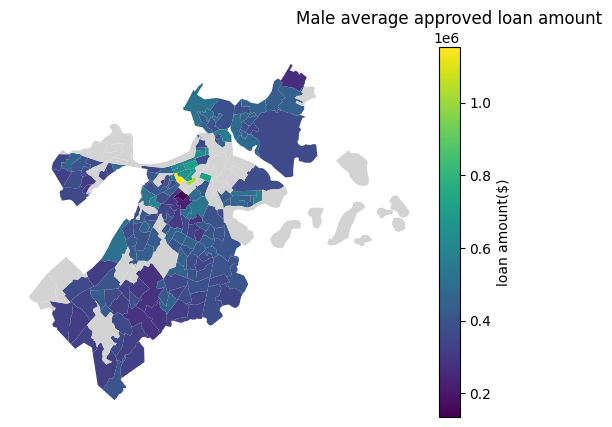

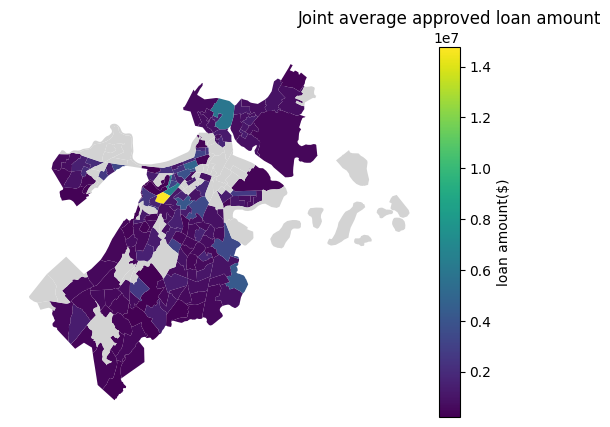

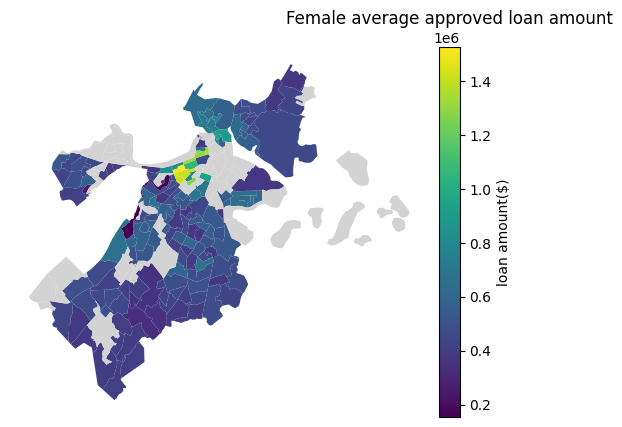

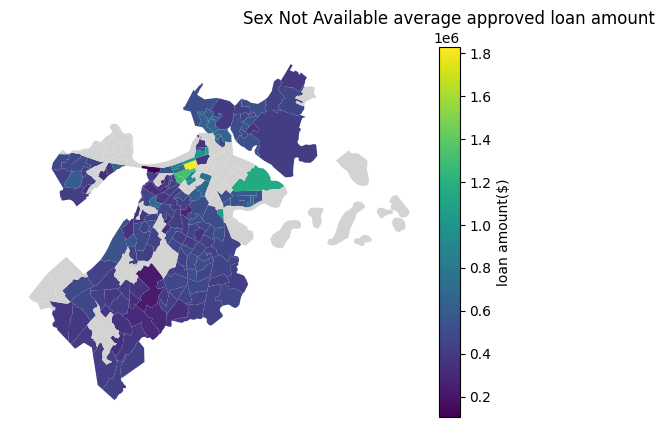

In [134]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
for colName in ['Male','Joint','Female','Sex Not Available']:
    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off()
    # ax.xaxis.set_visible(False)
    # ax.set_frame_on(True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    
    fmt = "${x:,.0f}"
    tick_format = ticker.StrMethodFormatter(fmt)
    cax.yaxis.set_major_formatter(tick_format)
    # cax.set_ylabel('y-axis label ($)', fontsize=12)

    plt.title(colName + " average approved loan amount")
    merge_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': "loan amount($)",
                    }, cax=cax, missing_kwds={'color': 'lightgrey'})
    plt.show()

## all loan amount for derived sex

In [115]:
# group the original dataframe by 'derived_sex' and 'census_tract'
grouped = df.groupby(['derived_sex','census_tract']).mean()['loan_amount'].reset_index()

# create a pivot table with 'census_tract' as index, 'derived_sex' as columns, and 'loan_amount' as values
pivot_table = pd.pivot_table(grouped, values='loan_amount', index='census_tract', columns='derived_sex')

# reset the index to create a new dataframe with 'census_tract' as a separate column
new_df = pivot_table.reset_index()

# rename the columns to remove the 'derived_sex' prefix
new_df.columns = ['census_tract'] + list(new_df.columns[1:].str.split('_').str[1])

# fill any missing values with 0
# new_df = new_df.fillna(0)
new_df = new_df.fillna(new_df.mean())

# create a list of derived_sex types from the original dataframe
sex_types = df['derived_sex'].unique().tolist()

# iterate over the columns of the new dataframe and rename them
for i in range(1, len(new_df.columns)):
    new_df = new_df.rename(columns={new_df.columns[i]: sex_types[i-1]})

# def mergeDF(df1, df2, )

print(tracts.head())
new_df.head()

   OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0         1        25        025    140202  25025140202  1402.02   
1         2        25        025    140300  25025140300     1403   
2         3        25        025    140400  25025140400     1404   
3         4        25        025    140106  25025140106  1401.06   
4         5        25        025    110201  25025110201  1102.01   

     NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0  Census Tract   G5020          S  1538599     17120  +42.2495181   
1  Census Tract   G5020          S  1548879     38736  +42.2587734   
2  Census Tract   G5020          S  1874512     11680  +42.2692219   
3  Census Tract   G5020          S   278837      3116  +42.2738738   
4  Census Tract   G5020          S   348208         0  +42.2804960   

     INTPTLON20    Shape_STAr    Shape_STLe  \
0  -071.1175430  1.674441e+07  18525.133039   
1  -071.1188131  1.708768e+07  24186.699503   
2  -071.1118088  2.030132e+07

,census_tract,Male,Joint,Female,Sex Not Available
0,25021400100,527325.581395,682894.736842,1.011324e+06,2.805612e+06
1,25021400200,483571.428571,612407.407407,5.296875e+05,9.551299e+05
2,25021400300,523913.043478,702456.140351,9.159524e+05,1.035667e+06
3,25021400400,503524.590164,736718.750000,6.776437e+05,1.187159e+06
4,25021400500,604500.000000,767068.965517,6.358621e+05,9.305738e+05


In [116]:
merge_tract = tracts.merge(new_df, left_on='GEOID20', right_on='census_tract', how='left')
merge_tract.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,...,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry,census_tract,Male,Joint,Female,Sex Not Available
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,...,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2...",25025140202,326610.169492,397266.666667,424846.153846,417808.988764
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,...,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2...",25025140300,315375.939850,404910.714286,359923.076923,480945.945946
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,...,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2...",25025140400,272782.101167,334492.753623,304354.838710,299141.414141
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,...,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2...",25025140106,440000.000000,466818.181818,454166.666667,491000.000000
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,...,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2...",25025110201,356250.000000,344310.344828,331470.588235,494200.000000


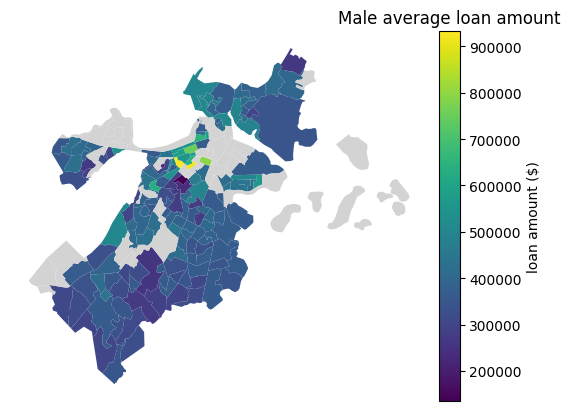

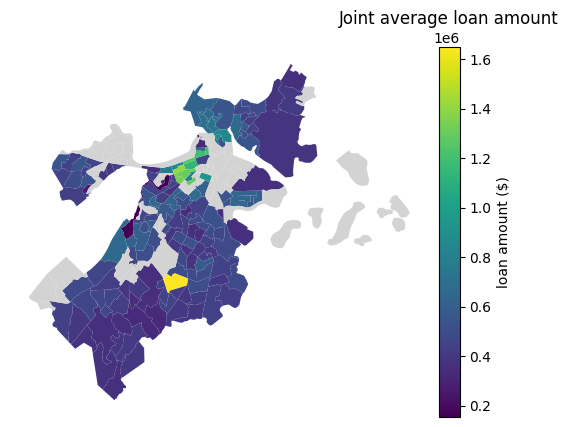

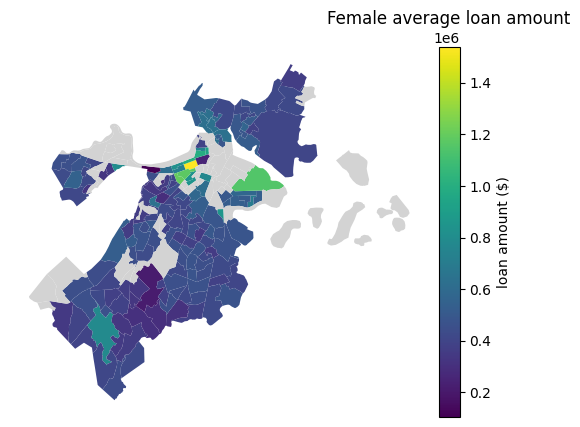

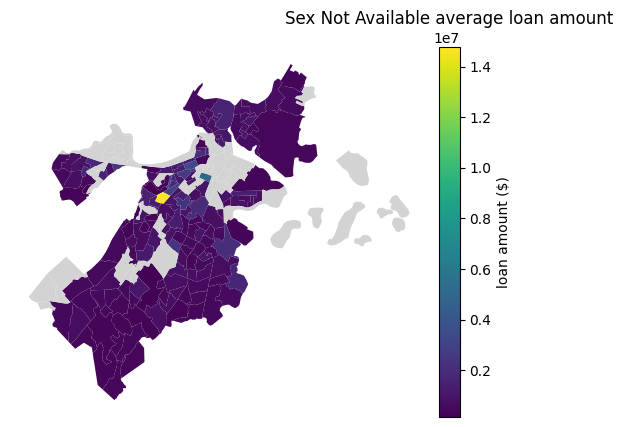

In [119]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for colName in ['Male','Joint','Female','Sex Not Available']:
    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    plt.title(colName + " average loan amount")
    merge_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': "loan amount ($)",
                    }, cax=cax, missing_kwds={'color': 'lightgrey'})
    plt.show()

def mapPlot(df_tract, colNames, title, label, unit="$"):
    for colName in colNames:
        fig, ax = plt.subplots(1, 1)
        ax.set_axis_off()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)

        plt.title(colName + title)
        df_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': label + unit,
                        }, cax=cax, missing_kwds={'color': 'lightgrey'})
        plt.show()

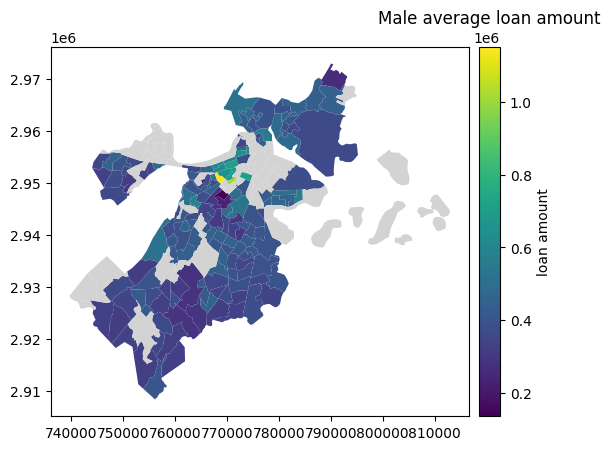

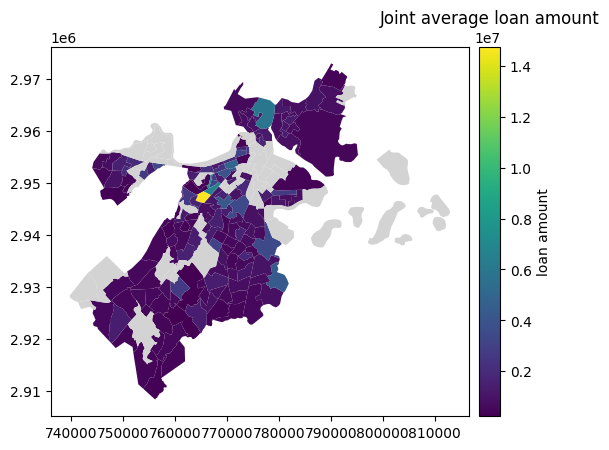

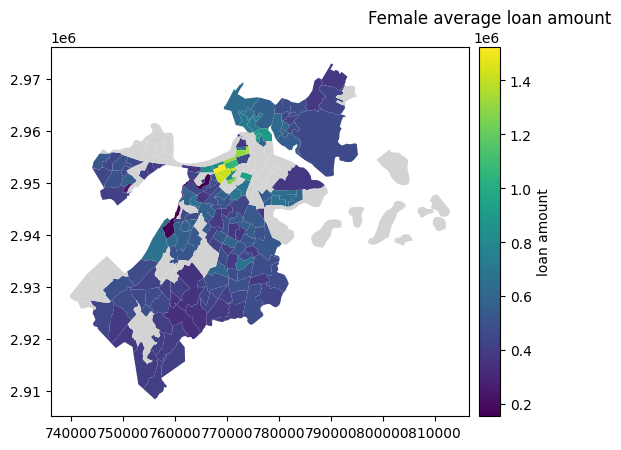

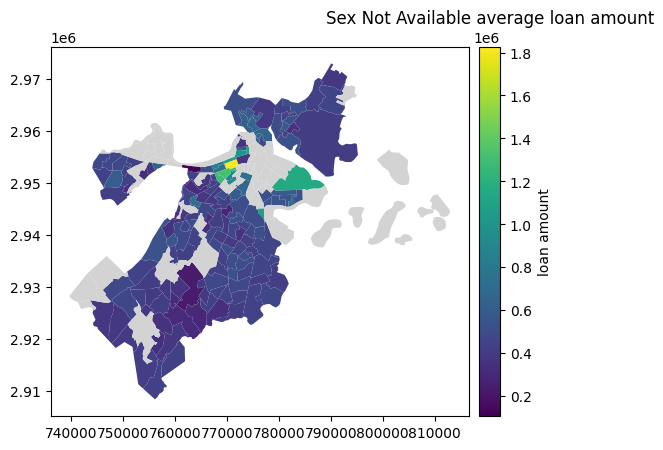

In [109]:
mapPlot(df_merge(df, tracts, "derived_sex"), ['Male','Joint','Female','Sex Not Available'], " average loan amount", "loan amount")

In [19]:
df.
grouped = df.groupby(['derived_sex','census_tract']).mean()['loan_amount'].reset_index()

# create a new dataframe with the unique census tracts as the index
df_tracts = pd.DataFrame(index=grouped['census_tract'].unique())

# loop through the derived_sex values and add them as columns to the new dataframe
for sex in grouped['derived_sex'].unique():
    # get the subset of the grouped dataframe for the current sex value
    subset = grouped[grouped['derived_sex'] == sex]
    
    # set the values for the current sex column in the new dataframe
    df_tracts[sex] = subset.set_index('census_tract')['loan_amount']
df["census_tract"] = df["census_tract"].astype(object)
# df_tracts.join(df["census_tract",""])
df = df.set_index('census_tract')

# Join the two dataframes on the 'census_tract' column in df and the index in df_tracts
df_tracts = df_tracts.join(df, on='GEOID20')

# df_tracts['census_tract'] = df_tracts.index
# df_tracts = pd.merge(df_tracts, df[['census_tract', 'GEOID20', 'derived_sex']], on='census_tract')
# df_tracts = df_tracts.set_index('GEOID20')

# set the 'sex' column based on matching df_tracts['GEOID20'] with df['census_tract']
df_tracts['sex'] = df.set_index('census_tract')['derived_sex']

KeyError: "['GEOID20'] not in index"

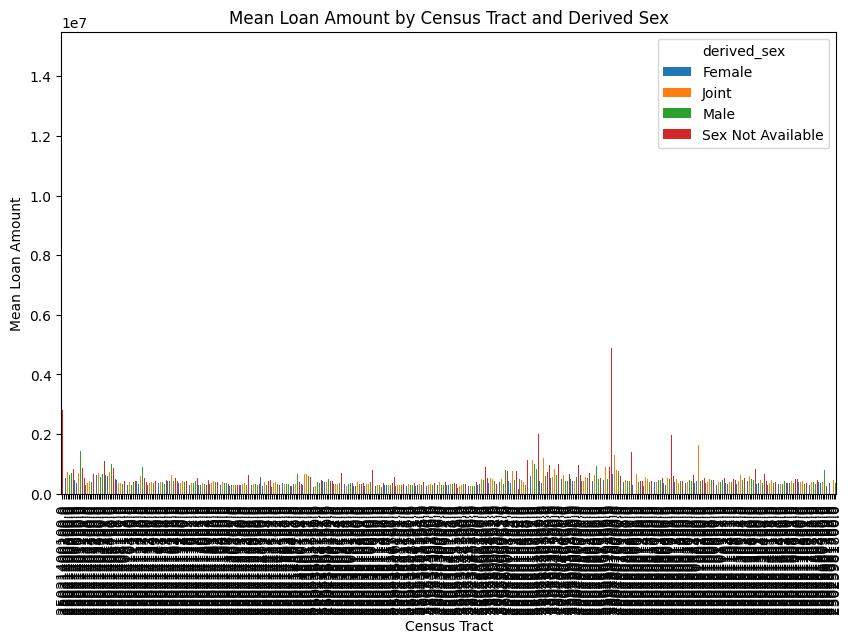

In [29]:
# tracts.describe()
# assuming your original dataframe is called `df`
grouped = df.groupby(['census_tract', 'derived_sex']).mean()['loan_amount'].reset_index()

# plot a bar graph of the mean loan amount for each group
fig, ax = plt.subplots(figsize=(10, 6))
grouped.pivot(index='census_tract', columns='derived_sex', values='loan_amount').plot(kind='bar', ax=ax)
ax.set_xlabel('Census Tract')
ax.set_ylabel('Mean Loan Amount')
ax.set_title('Mean Loan Amount by Census Tract and Derived Sex')
plt.show()

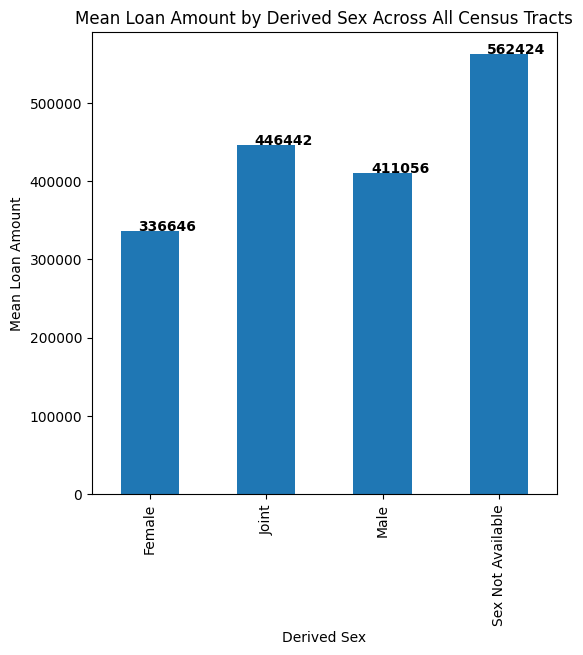

In [150]:
# group the data by derived sex and calculate the mean loan amount
grouped_by_sex = df.groupby(['derived_sex'])['loan_amount'].mean()

# plot a bar graph of the mean loan amount for each derived sex group across all census tracts
fig, ax = plt.subplots(figsize=(6, 6))
grouped_by_sex.plot(kind='bar', ax=ax)

# display the exact value for each bar
for i, v in enumerate(grouped_by_sex):
    ax.text(i - 0.1, v + 100, f"{v:.0f}", color='black', fontweight='bold')

ax.set_xlabel('Derived Sex')
ax.set_ylabel('Mean Loan Amount')
ax.set_title('Mean Loan Amount by Derived Sex Across All Census Tracts')
plt.show()

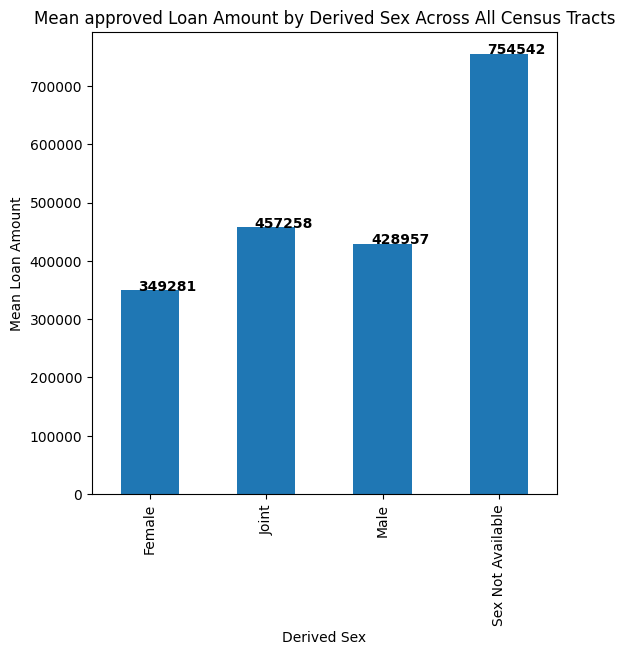

In [148]:
df_accept = df.loc[df["action_taken"].isin([1, 2])]
# group the data by derived sex and calculate the mean loan amount
grouped_by_sex = df_accept.groupby(['derived_sex'])['loan_amount'].mean()

# plot a bar graph of the mean loan amount for each derived sex group across all census tracts
fig, ax = plt.subplots(figsize=(6, 6))
grouped_by_sex.plot(kind='bar', ax=ax)

# display the exact value for each bar
for i, v in enumerate(grouped_by_sex):
    ax.text(i - 0.1, v + 100, f"{v:.0f}", color='black', fontweight='bold')

ax.set_xlabel('Derived Sex')
ax.set_ylabel('Mean Loan Amount')
ax.set_title('Mean approved Loan Amount by Derived Sex Across All Census Tracts')
plt.show()

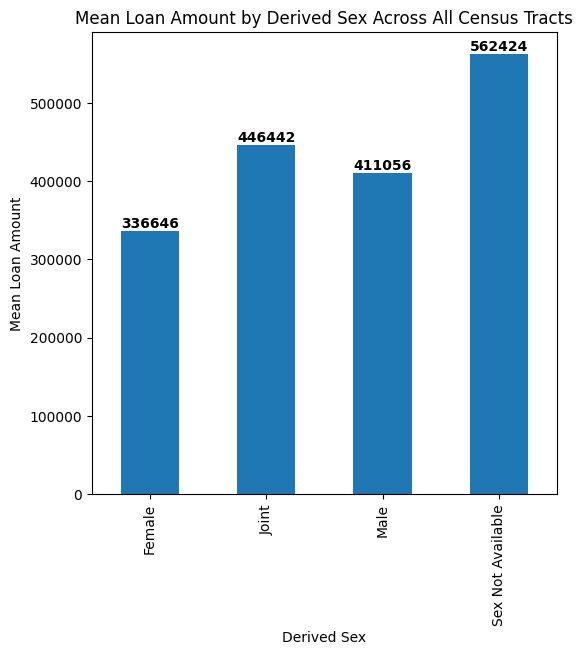

In [146]:
grouped_by_sex = df.groupby(['derived_sex'])['loan_amount'].mean()

# plot a bar graph of the mean loan amount for each derived sex group across all census tracts
fig, ax = plt.subplots(figsize=(6, 6))
bar_plot = grouped_by_sex.plot(kind='bar', ax=ax)

# # add labels for each bar
# for i, v in enumerate(grouped_by_sex):
#     ax.text(i - 0.1, v + 100, f"{v:.0f}", color='black', fontweight='bold')

# add values for each bar
for rect in bar_plot.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y + 5, f"{y:.0f}", ha='center', va='bottom', color='black', fontweight='bold')

ax.set_xlabel('Derived Sex')
ax.set_ylabel('Mean Loan Amount')
ax.set_title('Mean Loan Amount by Derived Sex Across All Census Tracts')
plt.show()

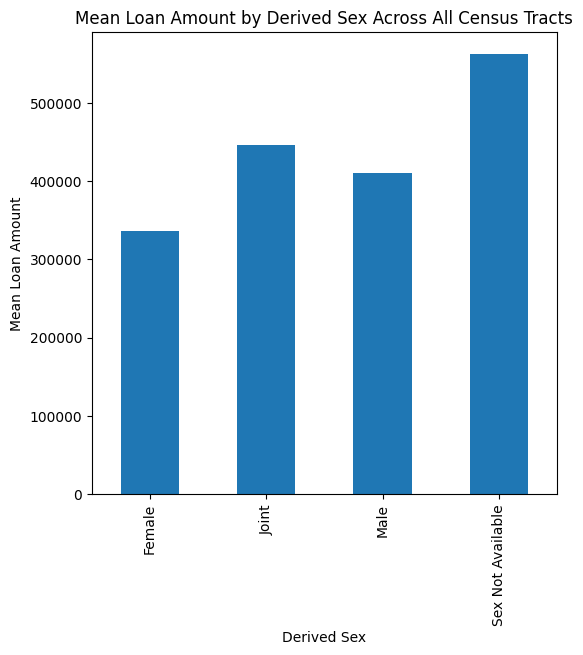

In [144]:
# grouped_by_sex = df.groupby(['derived_sex']).mean()['loan_amount']


# # plot a bar graph of the mean loan amount for each derived sex group across all census tracts
# fig, ax = plt.subplots(figsize=(6, 6))
# grouped_by_sex.plot(kind='bar', ax=ax)
# ax.set_xlabel('Derived Sex')
# ax.set_ylabel('Mean Loan Amount')
# ax.set_title('Mean Loan Amount by Derived Sex Across All Census Tracts')
# plt.show()

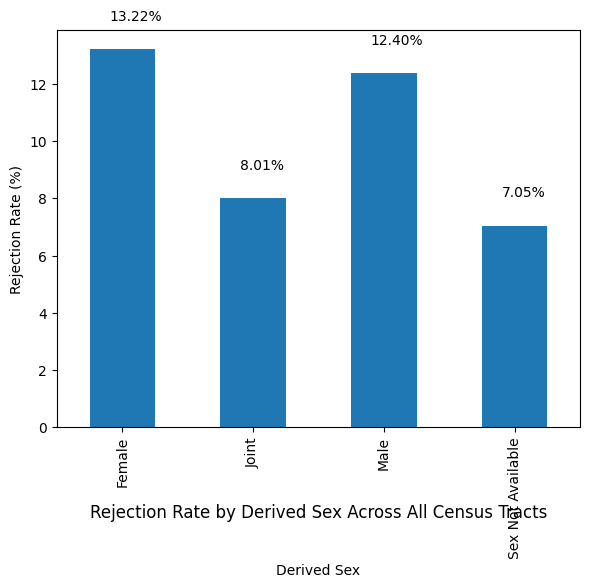

In [160]:
# assuming your original dataframe is called `df`
rejected = df.loc[df["action_taken"] == 3]

# group the rejected loans by derived sex and count the number of loans
rejected_grouped = rejected.groupby('derived_sex').size()

# calculate the total number of loans by derived sex
total_grouped = df.groupby('derived_sex').size()

# calculate the rejection rate for each derived sex group
rejection_rate = rejected_grouped / total_grouped * 100

# plot a bar graph of the rejection rate for each derived sex group across all census tracts
fig, ax = plt.subplots(figsize=(6, 6))
rejection_rate.plot(kind='bar', ax=ax)

# display the value on each bar
for i, v in enumerate(rejection_rate):
    ax.text(i - 0.1, v + 1, f"{v:.2f}%", color='black')

ax.set_xlabel('Derived Sex')
ax.set_ylabel('Rejection Rate (%)')

# move the title to the bottom
# ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_title('Rejection Rate by Derived Sex Across All Census Tracts', y=-0.25)

# adjust the plot layout to avoid overlapping with the title
plt.tight_layout()

plt.show()

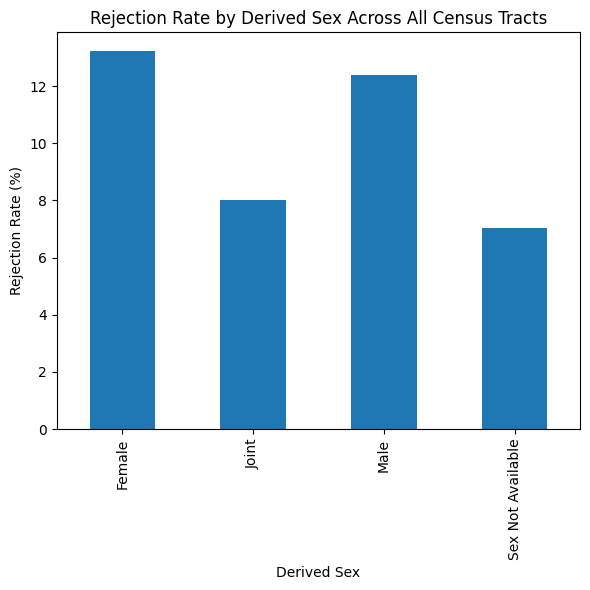

In [151]:
# assuming your original dataframe is called `df`
rejected = df.loc[df["action_taken"] == 3]

# group the rejected loans by derived sex and count the number of loans
rejected_grouped = rejected.groupby('derived_sex').size()

# calculate the total number of loans by derived sex
total_grouped = df.groupby('derived_sex').size()

# calculate the rejection rate for each derived sex group
rejection_rate = rejected_grouped / total_grouped * 100

# plot a bar graph of the rejection rate for each derived sex group across all census tracts
fig, ax = plt.subplots(figsize=(6, 6))
rejection_rate.plot(kind='bar', ax=ax)

# for i, v in enumerate(rejection_rate):
#     ax.text(i - 0.1, v + 1, f"{v:.2f}%", color='black', fontweight='bold')


ax.set_xlabel('Derived Sex')
ax.set_ylabel('Rejection Rate (%)')
ax.set_title('Rejection Rate by Derived Sex Across All Census Tracts')
plt.tight_layout()
plt.show()